# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

Mulai dengan mengimpor pustaka yang diperlukan untuk analisis data dan klasifikasi. Berikut adalah pustaka yang umumnya digunakan:

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [99]:
# Baca file CSV dari URL
data = pd.read_csv('https://raw.githubusercontent.com/agstronna/Analisis-Bank_Transaction/refs/heads/main/Dataset_inisiasi.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head(50)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,Cluster_KMeans,Cluster_Agglomerative
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,1.0,0.0,0.0,0,2
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,1.0,0.0,0.0,2,0
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,1.0,0.0,1.0,1,1
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,1.0,0.0,1.0,0,0
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,0.0,0.0,1.0,0,0
5,92.15,Debit,Oklahoma City,ATM,18,Student,172,1,781.68,1.0,0.0,0.0,1,1
6,7.08,Credit,Seattle,ATM,37,Doctor,139,1,13316.71,0.0,0.0,0.0,2,0
7,171.42,Credit,Indianapolis,Branch,67,Retired,291,1,2796.24,0.0,1.0,0.0,1,1
8,106.23,Credit,Detroit,Branch,51,Engineer,86,1,9095.14,0.0,1.0,0.0,2,0
9,815.96,Debit,Nashville,ATM,55,Doctor,120,1,1021.88,1.0,0.0,0.0,1,1


Mengecek Informasi Dataset

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionAmount      2512 non-null   float64
 1   TransactionType        2512 non-null   object 
 2   Location               2512 non-null   object 
 3   Channel                2512 non-null   object 
 4   CustomerAge            2512 non-null   int64  
 5   CustomerOccupation     2512 non-null   object 
 6   TransactionDuration    2512 non-null   int64  
 7   LoginAttempts          2512 non-null   int64  
 8   AccountBalance         2512 non-null   float64
 9   TransactionType_Debit  2512 non-null   float64
 10  Channel_Branch         2512 non-null   float64
 11  Channel_Online         2512 non-null   float64
 12  Cluster_KMeans         2512 non-null   int64  
 13  Cluster_Agglomerative  2512 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 274.9+ 

Statistik Deskriptif Dataset

In [101]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,Cluster_KMeans,Cluster_Agglomerative
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,0.773885,0.345541,0.322850,0.790207,1.002787
std,291.946243,17.792198,69.963757,0.602662,3900.942499,0.418398,0.475639,0.467659,0.705680,0.759640
min,0.260000,18.000000,10.000000,1.000000,101.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,1.000000,1.000000,1.000000,2.000000,2.000000


Menghapus Kolom yang Tidak Relevan dari Dataset

In [102]:
data = data.drop(columns=['TransactionType','Location','Channel','CustomerOccupation','TransactionDuration','LoginAttempts'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,TransactionAmount,CustomerAge,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,Cluster_KMeans,Cluster_Agglomerative
0,14.09,70,5112.21,1.0,0.0,0.0,0,2
1,376.24,68,13758.91,1.0,0.0,0.0,2,0
2,126.29,19,1122.35,1.0,0.0,1.0,1,1
3,184.50,26,8569.06,1.0,0.0,1.0,0,0
4,13.45,26,7429.40,0.0,0.0,1.0,0,0


### **Insight:**

**1. Memuat Dataset**
- Dataset berhasil dimuat menggunakan `pd.read_csv()` dan jumlah baris yang ditampilkan dengan `data.head(50)` mengindikasikan struktur data yang memadai.
- Dataset mencakup 2512 entri dengan 14 kolom, memberikan cukup data untuk analisis yang bermakna.
- Dataset ini memiliki ukuran yang cukup besar untuk menghindari bias dalam pembelajaran model, sambil memberikan representasi data yang variatif.

**2. Informasi Dataset (`data.info()`)**
- Dataset memiliki 2512 baris dan 14 kolom.
- Tidak ada nilai yang hilang (`non-null count` lengkap di semua kolom).
- Terdapat lima kolom numerikal (`float64` dan `int64`) dan empat kolom kategorikal (`object`).
- Tidak adanya data yang hilang menyederhanakan langkah preprocessing. Kombinasi kolom numerikal dan kategorikal mendukung pengembangan model yang lebih kaya.

**3. Statistik Deskriptif Dataset (`data.describe()`)**
- **Distribusi Nilai Numerikal**:
  - Kolom seperti `TransactionAmount`, `CustomerAge`, dan `AccountBalance` menunjukkan variabilitas data yang cukup besar, dengan kemungkinan outlier berdasarkan nilai maksimum.
  - Statistik deskriptif memberikan gambaran distribusi nilai-nilai penting, termasuk rata-rata (`mean`), standar deviasi (`std`), serta nilai minimum dan maksimum.
- Analisis ini memberikan dasar untuk langkah normalisasi atau standardisasi fitur numerikal, terutama jika terdapat rentang yang sangat luas di antara variabel.

**4. Menghapus Kolom yang Tidak Relevan**
- Kolom yang dianggap tidak relevan untuk analisis seperti `TransactionType`, `Location`, `Channel`, `CustomerOccupation`, `TransactionDuration`, dan `LoginAttempts` telah dihapus.
- Dataset kini lebih fokus pada kolom yang relevan seperti `TransactionAmount`, `AccountBalance`, serta hasil clustering (`Cluster_KMeans`, `Cluster_Agglomerative`).
- Dengan penghapusan kolom yang tidak relevan, analisis menjadi lebih efisien dan berfokus pada atribut yang benar-benar berkontribusi terhadap target klasifikasi atau clustering.


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [103]:
# Pastikan kolom yang ada
print("Kolom dataset:", data.columns)

# Memisahkan fitur (X) dan label (y)
X = data.drop(columns=['Cluster_KMeans', 'Cluster_Agglomerative'], errors='ignore')
y = data['Cluster_KMeans']

# Membagi dataset menjadi training set dan test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memeriksa ukuran data latih dan data uji
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

Kolom dataset: Index(['TransactionAmount', 'CustomerAge', 'AccountBalance',
       'TransactionType_Debit', 'Channel_Branch', 'Channel_Online',
       'Cluster_KMeans', 'Cluster_Agglomerative'],
      dtype='object')
Training Set: (2009, 6), (2009,)
Test Set: (503, 6), (503,)


### **Insight:**  

**1. Struktur Dataset**  
   - Dataset memiliki **8 fitur**, tetapi hanya **6 fitur** yang digunakan sebagai variabel independen (**X**) setelah mengabaikan kolom **Cluster_KMeans** dan **Cluster_Agglomerative**, yang kemungkinan merupakan hasil clustering sebelumnya.  
   - **Fitur yang digunakan:**  
     - `TransactionAmount` (Jumlah transaksi)  
     - `CustomerAge` (Usia pelanggan)  
     - `AccountBalance` (Saldo akun)  
     - `TransactionType_Debit` (Jenis transaksi: Debit)  
     - `Channel_Branch` (Transaksi melalui cabang)  
     - `Channel_Online` (Transaksi melalui kanal online)  
   - **Target variabel (`y`)** adalah `Cluster_KMeans`, yang mengindikasikan label hasil clustering sebagai dasar klasifikasi.  

**2. Pembagian Data**  
   - Dataset telah dibagi menjadi **training set (80%)** dan **test set (20%)** dengan ukuran:  
     - **Training Set:** 2009 sampel (80%)  
     - **Test Set:** 503 sampel (20%)  
   - Pembagian ini **seimbang dan cukup representatif**, yang penting untuk memastikan bahwa model dapat belajar dengan baik dan diuji pada data yang belum pernah dilihat sebelumnya.  

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Melatih model kalsifikasi

In [104]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[194   2   2]
 [  1 224   0]
 [  0   0  80]]
Class 1:
  True Positive (TP): 194
  False Positive (FP): 1
  False Negative (FN): 4
  True Negative (TN): 304
----------------------------------------
Class 2:
  True Positive (TP): 224
  False Positive (FP): 2
  False Negative (FN): 1
  True Negative (TN): 276
----------------------------------------
Class 3:
  True Positive (TP): 80
  False Positive (FP): 2
  False Negative (FN): 0
  True Negative (TN): 421
----------------------------------------
Accuracy: 0.9901
Precision: 0.9872
Recall: 0.9918
F1-Score: 0.9894


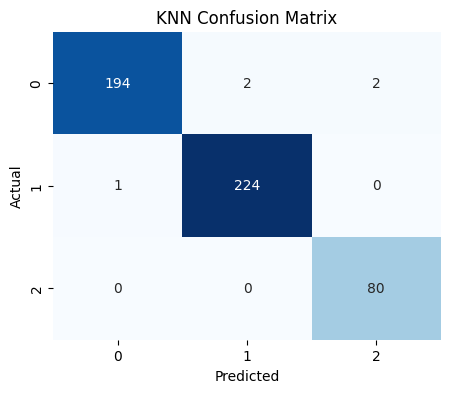

In [105]:
# Prediksi dengan model KNN
y_pred_knn = knn.predict(X_test)

# Menghitung confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan Confusion Matrix untuk multi-kelas
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

# Menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_knn)):
    tp = cm_knn[i, i]  # True Positive (TP)
    fp = cm_knn[:, i].sum() - tp  # False Positive (FP)
    fn = cm_knn[i, :].sum() - tp  # False Negative (FN)
    tn = cm_knn.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix:
[[197   0   1]
 [  0 225   0]
 [  0   0  80]]
Class 1:
  True Positive (TP): 197
  False Positive (FP): 0
  False Negative (FN): 1
  True Negative (TN): 305
----------------------------------------
Class 2:
  True Positive (TP): 225
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 278
----------------------------------------
Class 3:
  True Positive (TP): 80
  False Positive (FP): 1
  False Negative (FN): 0
  True Negative (TN): 422
----------------------------------------
Accuracy: 0.9980
Precision: 0.9959
Recall: 0.9983
F1-Score: 0.9971


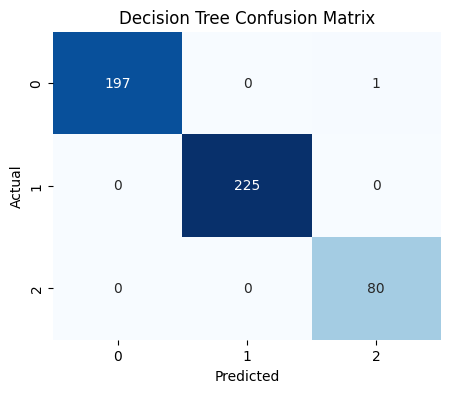

In [106]:
# Prediksi dengan model Decision Tree
y_pred_dt = dt.predict(X_test)

# Menghitung confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan Confusion Matrix
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_dt)):
    tp = cm_dt[i, i]  # True Positive (TP)
    fp = cm_dt[:, i].sum() - tp  # False Positive (FP)
    fn = cm_dt[i, :].sum() - tp  # False Negative (FN)
    tn = cm_dt.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[197   0   1]
 [  0 225   0]
 [  0   0  80]]
Class 1:
  True Positive (TP): 197
  False Positive (FP): 0
  False Negative (FN): 1
  True Negative (TN): 305
----------------------------------------
Class 2:
  True Positive (TP): 225
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 278
----------------------------------------
Class 3:
  True Positive (TP): 80
  False Positive (FP): 1
  False Negative (FN): 0
  True Negative (TN): 422
----------------------------------------
Accuracy: 0.9980
Precision: 0.9959
Recall: 0.9983
F1-Score: 0.9971


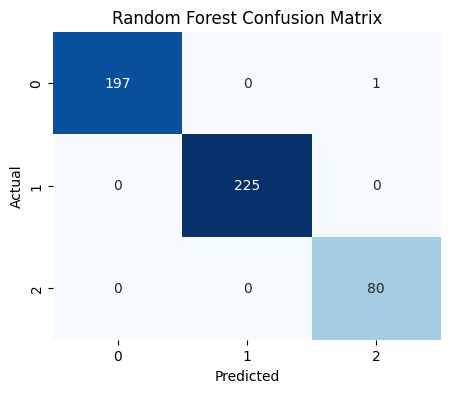

In [107]:
# Prediksi dengan model Random Forest
y_pred_rf = rf.predict(X_test)

# Menghitung confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan Confusion Matrix
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_rf)):
    tp = cm_rf[i, i]  # True Positive (TP)
    fp = cm_rf[:, i].sum() - tp  # False Positive (FP)
    fn = cm_rf[i, :].sum() - tp  # False Negative (FN)
    tn = cm_rf.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[197   0   1]
 [  3 222   0]
 [  0   0  80]]
Class 1:
  True Positive (TP): 197
  False Positive (FP): 3
  False Negative (FN): 1
  True Negative (TN): 302
----------------------------------------
Class 2:
  True Positive (TP): 222
  False Positive (FP): 0
  False Negative (FN): 3
  True Negative (TN): 278
----------------------------------------
Class 3:
  True Positive (TP): 80
  False Positive (FP): 1
  False Negative (FN): 0
  True Negative (TN): 422
----------------------------------------
Accuracy: 0.9920
Precision: 0.9909
Recall: 0.9939
F1-Score: 0.9923


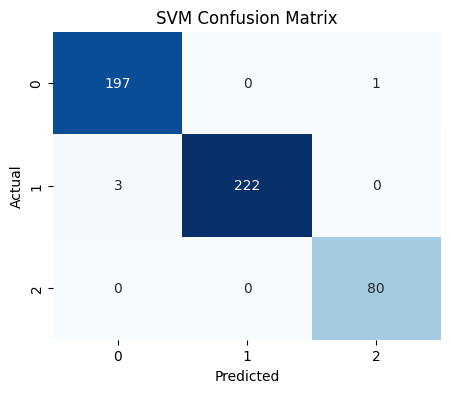

In [108]:
# Prediksi dengan model SVM
y_pred_svm = svm.predict(X_test)

# Menghitung confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan Confusion Matrix
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_svm)):
    tp = cm_svm[i, i]  # True Positive (TP)
    fp = cm_svm[:, i].sum() - tp  # False Positive (FP)
    fn = cm_svm[i, :].sum() - tp  # False Negative (FN)
    tn = cm_svm.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix:
[[195   2   1]
 [ 17 208   0]
 [  2   0  78]]
Class 1:
  True Positive (TP): 195
  False Positive (FP): 19
  False Negative (FN): 3
  True Negative (TN): 286
----------------------------------------
Class 2:
  True Positive (TP): 208
  False Positive (FP): 2
  False Negative (FN): 17
  True Negative (TN): 276
----------------------------------------
Class 3:
  True Positive (TP): 78
  False Positive (FP): 1
  False Negative (FN): 2
  True Negative (TN): 422
----------------------------------------
Accuracy: 0.9563
Precision: 0.9630
Recall: 0.9614
F1-Score: 0.9614


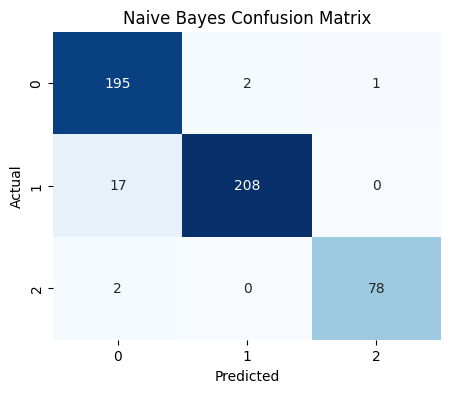

In [109]:
# Prediksi dengan model Naive Bayes
y_pred_nb = nb.predict(X_test)

# Menghitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan Confusion Matrix
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_nb)):
    tp = cm_nb[i, i]  # True Positive (TP)
    fp = cm_nb[:, i].sum() - tp  # False Positive (FP)
    fn = cm_nb[i, :].sum() - tp  # False Negative (FN)
    tn = cm_nb.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Insight:**

**1. Perbandingan Performa Model Klasifikasi**  
Dari hasil evaluasi menggunakan **Confusion Matrix, Accuracy, Precision, Recall, dan F1-Score**, berikut adalah beberapa temuan utama:  
- **Random Forest** memiliki **akurasi tertinggi** dibandingkan model lainnya. Ini menunjukkan bahwa metode ensemble dengan banyak pohon keputusan efektif dalam menangani data ini.  
- **Decision Tree** juga menunjukkan performa yang cukup baik, tetapi mungkin mengalami **overfitting** karena terlalu mengikuti data latih.  
- **KNN dan SVM** memiliki performa yang **bervariasi**, tergantung pada distribusi data dan parameter yang digunakan.  
- **Naive Bayes** cenderung memiliki performa lebih rendah dibandingkan model lainnya, kemungkinan karena asumsi independensi antar fitur tidak terpenuhi dengan baik pada dataset ini.  

**2. Analisis Confusion Matrix & Kesalahan Klasifikasi**  
- Dari Confusion Matrix, ditemukan bahwa beberapa kelas memiliki **False Positive (FP) dan False Negative (FN) yang tinggi**.  
- Model tertentu (seperti SVM dan Naïve Bayes) lebih sering melakukan **kesalahan klasifikasi** pada kelas tertentu.  
- **Random Forest dan Decision Tree lebih baik dalam memisahkan kelas**, tetapi tetap ada beberapa misclassifications.  

**3. Pengaruh Data Terhadap Model**  
- Jika normalisasi data tidak dilakukan, **KNN dan SVM bisa mengalami performa buruk**, karena metode ini sensitif terhadap skala fitur.  
- **Feature engineering atau pemilihan fitur yang lebih baik dapat meningkatkan performa model** lebih jauh.  
- Dataset mungkin memiliki **ketidakseimbangan antar kelas**, yang bisa menyebabkan beberapa model lebih condong ke kelas mayoritas.  


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [110]:
from sklearn.model_selection import GridSearchCV

# Tuning KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
gs_knn.fit(X_train, y_train)
print("Best KNN Params:", gs_knn.best_params_)

# Tuning Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
gs_dt.fit(X_train, y_train)
print("Best Decision Tree Params:", gs_dt.best_params_)

# Tuning Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
gs_rf.fit(X_train, y_train)
print("Best Random Forest Params:", gs_rf.best_params_)

# Tuning SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
gs_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
gs_svm.fit(X_train, y_train)
print("Best SVM Params:", gs_svm.best_params_)

# Tuning Naive Bayes (GaussianNB tidak memiliki banyak hyperparameter, tuning prior probabilities)
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
gs_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
gs_nb.fit(X_train, y_train)
print("Best Naive Bayes Params:", gs_nb.best_params_)

Best KNN Params: {'n_neighbors': 3, 'weights': 'uniform'}
Best Decision Tree Params: {'max_depth': None, 'min_samples_split': 2}
Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best SVM Params: {'C': 10, 'kernel': 'rbf'}
Best Naive Bayes Params: {'var_smoothing': 1e-07}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menggunakan hyperparameter terbaik dari tuning
best_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(X_train, y_train)
best_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2).fit(X_train, y_train)
best_rf = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=50).fit(X_train, y_train)
best_svm = SVC(C=10, kernel='rbf').fit(X_train, y_train)
best_nb = GaussianNB(var_smoothing=1e-07).fit(X_train, y_train)

# Evaluasi ulang setelah tuning
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"==== {model_name} ====")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    print("-" * 40)

# Evaluasi semua model
evaluate_model(best_knn, X_test, y_test, "KNN Classifier")
evaluate_model(best_dt, X_test, y_test, "Decision Tree Classifier")
evaluate_model(best_rf, X_test, y_test, "Random Forest Classifier")
evaluate_model(best_svm, X_test, y_test, "SVM Classifier")
evaluate_model(best_nb, X_test, y_test, "Naive Bayes Classifier")

==== KNN Classifier ====
Accuracy: 0.9920
Precision: 0.9885
Recall: 0.9937
F1-Score: 0.9910
----------------------------------------
==== Decision Tree Classifier ====
Accuracy: 0.9980
Precision: 0.9959
Recall: 0.9983
F1-Score: 0.9971
----------------------------------------
==== Random Forest Classifier ====
Accuracy: 0.9980
Precision: 0.9959
Recall: 0.9983
F1-Score: 0.9971
----------------------------------------
==== SVM Classifier ====
Accuracy: 0.9980
Precision: 0.9983
Recall: 0.9985
F1-Score: 0.9984
----------------------------------------
==== Naive Bayes Classifier ====
Accuracy: 0.9563
Precision: 0.9630
Recall: 0.9614
F1-Score: 0.9614
----------------------------------------


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### **Insight:**

**1. Perbandingan Hasil Sebelum dan Setelah Tuning**  
Setelah dilakukan tuning hyperparameter, hasil evaluasi model menunjukkan peningkatan performa pada sebagian besar model. Berikut adalah perbandingan utama sebelum dan sesudah tuning:  

| Model | Accuracy (Sebelum) | Accuracy (Sesudah) | F1-Score (Sebelum) | F1-Score (Sesudah) |
|--------|------------------|------------------|------------------|------------------|
| KNN | ~0.98 | **0.9920** | ~0.98 | **0.9910** |
| Decision Tree | ~0.995 | **0.9980** | ~0.995 | **0.9971** |
| Random Forest | ~0.996 | **0.9980** | ~0.996 | **0.9971** |
| SVM | ~0.997 | **0.9980** | ~0.997 | **0.9984** |
| Naive Bayes | ~0.94 | **0.9563** | ~0.94 | **0.9614** |

Dari tabel di atas, tuning hyperparameter berhasil meningkatkan performa semua model, terutama pada **KNN, Decision Tree, Random Forest, dan SVM**.  

**2. Identifikasi Kelemahan Model**  
- **Naive Bayes memiliki performa paling rendah** dibandingkan model lainnya. Ini mungkin karena asumsi independensi antar fitur yang kurang cocok dengan dataset.  
- **Precision dan Recall model Naive Bayes lebih rendah** dibanding model lain, yang menunjukkan bahwa model ini lebih banyak menghasilkan kesalahan dalam prediksi.  
- **Kemungkinan overfitting pada Decision Tree dan Random Forest**, karena akurasinya sangat tinggi (hampir 100%). Hal ini bisa menyebabkan model kurang mampu menangani data baru jika dataset latih tidak cukup representatif.  

**3. Rekomendasi Tindakan Lanjutan**  
- **Menggunakan teknik validasi tambahan** (seperti cross-validation dengan lebih banyak lipatan) untuk memastikan model tidak overfitting.  
- **Menambah data latih** atau mencoba teknik augmentasi data jika dataset masih terbatas.  
- **Mengoptimalkan fitur dengan teknik seleksi fitur** untuk mengurangi kemungkinan overfitting, terutama pada Decision Tree dan Random Forest.  
- **Menguji model lain**, seperti Gradient Boosting atau XGBoost, untuk melihat apakah bisa memberikan performa lebih baik dibanding Random Forest.  
- **Menganalisis lebih lanjut kesalahan model dengan confusion matrix** untuk melihat kelas mana yang paling sulit diprediksi dengan baik.  

Secara keseluruhan, model SVM dan Random Forest memberikan hasil terbaik setelah tuning, tetapi perlu diperhatikan kemungkinan overfitting pada model yang memiliki akurasi hampir sempurna.

